In [11]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 587.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/8.1 MB 587.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/8.1 MB 587.2 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.1 MB 467.0 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/8.1 MB 467.0 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.1 MB 543.6 kB/s eta 0:00:14
   ----- ---------------------------------- 1.0/8.1 MB 543.6 kB/s eta 0:00:14
   ----- ----------------------

In [9]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


The average temparature is:  31.0

Results Table:
+-----+----------+-------------+---------+
|   t |   Actual |   Predicted |   Error |
+=====+==========+=============+=========+
|   1 |       30 |     31      | -1      |
+-----+----------+-------------+---------+
|   2 |       32 |     30.4    |  1.6    |
+-----+----------+-------------+---------+
|   3 |       31 |     31.96   | -0.96   |
+-----+----------+-------------+---------+
|   4 |       29 |     30.424  | -1.424  |
+-----+----------+-------------+---------+
|   5 |       33 |     30.1456 |  2.8544 |
+-----+----------+-------------+---------+


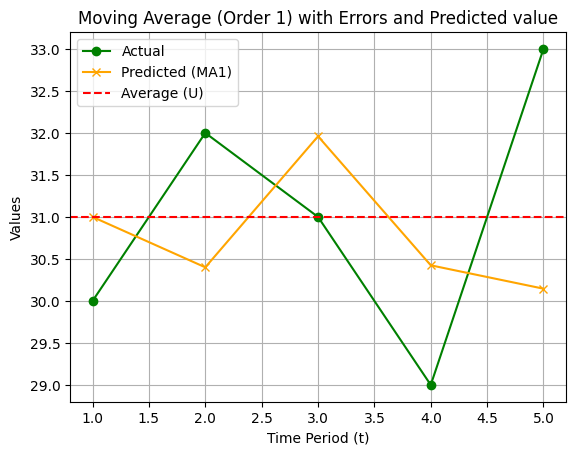

In [ ]:
from tabulate import tabulate
import matplotlib.pyplot as plt
                                        
n = int(input("Enter number of days: "))

actual = []
sum=0
for i in range(n):
    a = float(input(f"Enter actual temperature on day {i+1} c: "))
    actual.append(a)
    sum+=a
mean=sum/n
print("The average temparature is: ", mean)

phi=float(input("Enter the percentage influence of previous error: "))
predicted=[]
errors=[]


for i in range(n):
    if(i==0):
        predicted.append(mean)  
        errors.append(actual[i]-predicted[i])
    else:  
        predicted.append(mean + (errors[i-1] * phi))
        errors.append(actual[i]-predicted[i])
    
table_data = []
for i in range(n):
    table_data.append([i+1, actual[i], predicted[i], errors[i]])

print("\nResults Table:")
print(tabulate(table_data, headers=["t", "Actual", "Predicted", "Error"], tablefmt="grid"))

t_values = list(range(1, n+1))
plt.plot(t_values, actual, label="Actual", marker="o", color="green")
plt.plot(t_values, predicted, label="Predicted (MA1)", marker="x", color="orange")
plt.axhline(y=mean, color="red", linestyle="--", label="Average (U)")
plt.xlabel("Time Period (t)")
plt.ylabel("Values")
plt.title("Moving Average (Order 1) with Errors and Predicted value")
plt.legend()
plt.grid(True)
plt.show()


The average temparature is:  31.0

Results Table:
+-----+----------+-------------+---------+
|   t |   Actual |   Predicted |   Error |
+=====+==========+=============+=========+
|   1 |       30 |      31     |  -1     |
+-----+----------+-------------+---------+
|   2 |       32 |      30.4   |   1.6   |
+-----+----------+-------------+---------+
|   3 |       31 |      31.5   |  -0.5   |
+-----+----------+-------------+---------+
|   4 |       29 |      31.23  |  -2.23  |
+-----+----------+-------------+---------+
|   5 |       33 |      29.735 |   3.265 |
+-----+----------+-------------+---------+


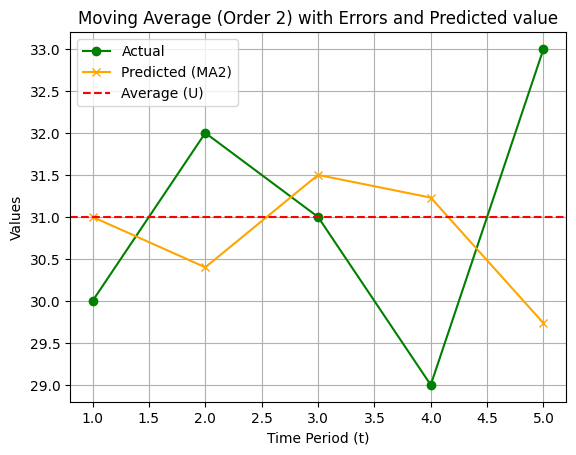

In [4]:
from tabulate import tabulate
import matplotlib.pyplot as plt

n = int(input("Enter number of days: "))

actual = []
sum=0
for i in range(n):
    a = float(input(f"Enter actual temperature on day {i+1} c: "))
    actual.append(a)
    sum+=actual[i]
mean=sum/n
print("The average temparature is: ", mean)

phi_1=float(input("Enter the percentage influence of previous error "))
phi_2=float(input("Enter the percentage influence of previous error"))

predicted=[]
errors=[]


for i in range(n):
    if(i==0):
        predicted.append(mean)  
        errors.append(actual[i]-predicted[i])
    elif(i==1):
        predicted.append(mean + (errors[i-1] * phi))
        errors.append(actual[i]-predicted[i])
    else:
        predicted.append(mean + (errors[i-1] * phi_1 ) + (phi_2 * errors[i-2]))
        errors.append(actual[i]-predicted[i])   
    
table_data = []
for i in range(n):
    table_data.append([i+1, actual[i], predicted[i], errors[i]])

print("\nResults Table:")
print(tabulate(table_data, headers=["t", "Actual", "Predicted", "Error"], tablefmt="grid"))

t_values = list(range(1, n+1))
plt.plot(t_values, actual, label="Actual", marker="o", color="green")
plt.plot(t_values, predicted, label="Predicted (MA2)", marker="x", color="orange")
plt.axhline(y=mean, color="red", linestyle="--", label="Average (U)")
plt.xlabel("Time Period (t)")
plt.ylabel("Values")
plt.title("Moving Average (Order 2) with Errors and Predicted value")
plt.legend()
plt.grid(True)
plt.show()
